In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from pandarallel import pandarallel
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from nltk import word_tokenize, pos_tag, ne_chunk
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier

### Pré-processamento melhor

In [6]:
true_df = pd.read_csv('noticias_combinedtrue.csv')
false_df = pd.read_csv('noticias_combinedfake.csv')

#Remover maiúsculas
true_df['corpo_texto'] = true_df['corpo_texto'].str.lower()
true_df['title'] = true_df['title'].str.lower()
true_df['corpo_texto'] = true_df['corpo_texto'].apply(nltk.word_tokenize)
#true_df['title'] = true_df['title'].apply(nltk.word_tokenize)

false_df['corpo_texto'] = false_df['corpo_texto'].str.lower()
false_df['title'] = false_df['title'].str.lower()
false_df['corpo_texto'] = false_df['corpo_texto'].apply(nltk.word_tokenize)
#false_df['title'] = false_df['title'].apply(nltk.word_tokenize)

stop_words = set(stopwords.words('portuguese'))

#função para remover pontuação
def clean_text(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens if word not in stop_words and re.sub(r'[^\w\s]', '', word)]

#Remover stop_words

true_df['corpo_texto'] = true_df['corpo_texto'].apply(clean_text)
false_df['corpo_texto'] = false_df['corpo_texto'].apply(clean_text)
#true_df['title'] = true_df['title'].apply(clean_text)
#false_df['title'] = false_df['title'].apply(clean_text)

display(true_df, false_df)

,title,link,date,Site,noticia_falsa,corpo_texto
0,covid-19,https://www.gov.br/saude/pt-br/assuntos/covid-19,Data não disponível,gov.br saude,1,"[covid19, ministério, saúde, ir, conteúdo, 1, ..."
1,vacinação,https://www.gov.br/saude/pt-br/vacinacao,Data não disponível,gov.br saude,1,"[vacinação, ministério, saúde, ir, conteúdo, 1..."
2,calendário de vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Data não disponível,gov.br saude,1,"[calendário, vacinação, ministério, saúde, ir,..."
3,calendário técnico nacional de vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Data não disponível,gov.br saude,1,"[calendário, técnico, nacional, vacinação, min..."
4,atividades de vacinação de alta qualidade,https://www.gov.br/saude/pt-br/vacinacao/avaq,Data não disponível,gov.br saude,1,"[atividades, vacinação, alta, qualidade, avaq,..."
...,...,...,...,...,...,...
355,decathlon recomendou que pessoas do grupo de r...,http://www.e-farsas.com/decathlon-recomendou-q...,Data não disponível,E-Farsas (Verdadeiros),1,"[decathlon, recomendou, pessoas, grupo, risco,..."
356,governo do maranhão vem fornecendo kits com cl...,http://www.e-farsas.com/governo-do-maranhao-ve...,Data não disponível,E-Farsas (Verdadeiros),1,"[governo, maranhão, vem, fornecendo, kits, clo..."
357,“kit covid-19” para combater o novo coronavíru...,http://www.e-farsas.com/kit-covid-19-para-comb...,Data não disponível,E-Farsas (Verdadeiros),1,"[kit, covid19, combater, novo, coronavírus, ve..."
358,"autoridades, parem de distorcer fatos sobre a ...",http://www.e-farsas.com/autoridades-parem-de-d...,Data não disponível,E-Farsas (Verdadeiros),1,"[autoridades, parem, distorcer, fatos, sobre, ..."


,title,link,date,Site,noticia_falsa,corpo_texto
0,é verdade que o número 95004-1117 aplica o gol...,http://www.e-farsas.com/e-verdade-que-o-numero...,Data não disponível,E-Farsas (Falso),0,"[verdade, número, 950041117, aplica, golpe, va..."
1,a pfizer mudou de nome para viatris para não s...,http://www.e-farsas.com/a-pfizer-mudou-de-nome...,Data não disponível,E-Farsas (Falso),0,"[pfizer, mudou, nome, viatris, responsabilizad..."
2,homem dado como morto pela covid em parauapeba...,http://www.e-farsas.com/homem-dado-como-morto-...,Data não disponível,E-Farsas (Falso),0,"[homem, dado, morto, covid, parauapebas, ressu..."
3,uma patente para um teste de covid-19 foi feit...,http://www.e-farsas.com/uma-patente-para-um-te...,Data não disponível,E-Farsas (Falso),0,"[patente, teste, covid19, feita, 2015, home, s..."
4,o menino luca morreu de parada cardíaca após s...,http://www.e-farsas.com/o-menino-luca-morreu-d...,Data não disponível,E-Farsas (Falso),0,"[menino, luca, morreu, parada, cardíaca, após,..."
...,...,...,...,...,...,...
306,monitoramento dos dados de vacinação,https://www.gov.br/saude/pt-br/vacinacao/monit...,Data não disponível,Gov - Fake,0,"[monitoramento, dados, vacinação, ministério, ..."
307,aquisição emergencial de 25 mil doses,https://agenciagov.ebc.com.br/noticias/202408/...,2024-08-20T16:41:40.382Z,Fato ou fake (G1),0,"[saúde, negocia, aquisição, 25, mil, doses, va..."
308,fake news sobre nanobots em vacinas contra cov...,https://www.boatos.org/saude/nanobots-foram-en...,2024-08-24T15:58:34-03:00,boatos.org,0,"[nanobots, encontrados, milhões, pessoas, vaci..."
309,é falso que brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,2024-08-24T15:58:34-03:00,boatos.org,0,"[brasil, único, país, exigir, vacina, contra, ..."


In [7]:
lista_tokens1 = true_df['corpo_texto'].sum()

frequencia_tokenstrue = Counter(lista_tokens1)

df_frequencia_tokenstrue = pd.DataFrame(frequencia_tokenstrue.items(), columns=['token', 'ocorrencia'])
df_frequencia_tokenstrue = df_frequencia_tokenstrue.sort_values(by='ocorrencia', ascending=False)

display(df_frequencia_tokenstrue)

,token,ocorrencia
2,saúde,10768
136,vacinação,4153
200,serviços,2512
192,públicas,2333
161,dados,2228
...,...,...
12381,facadas,1
12382,estuprando,1
12383,desafio,1
7169,1qf0aޤc,1


In [8]:
lista_tokens2 = false_df['corpo_texto'].sum()

frequencia_tokensfalse = Counter(lista_tokens2)

df_frequencia_tokensfalse = pd.DataFrame(frequencia_tokensfalse.items(), columns=['token', 'ocorrencia'])
df_frequencia_tokensfalse = df_frequencia_tokensfalse.sort_values(by='ocorrencia', ascending=False)

display(df_frequencia_tokensfalse)

,token,ocorrencia
1105,covid19,1487
0,verdade,1363
746,saúde,1353
9,sobre,1082
687,vida,1011
...,...,...
20206,bloqueio,1
20207,assustada,1
20208,desmentidas,1
20210,cujas,1


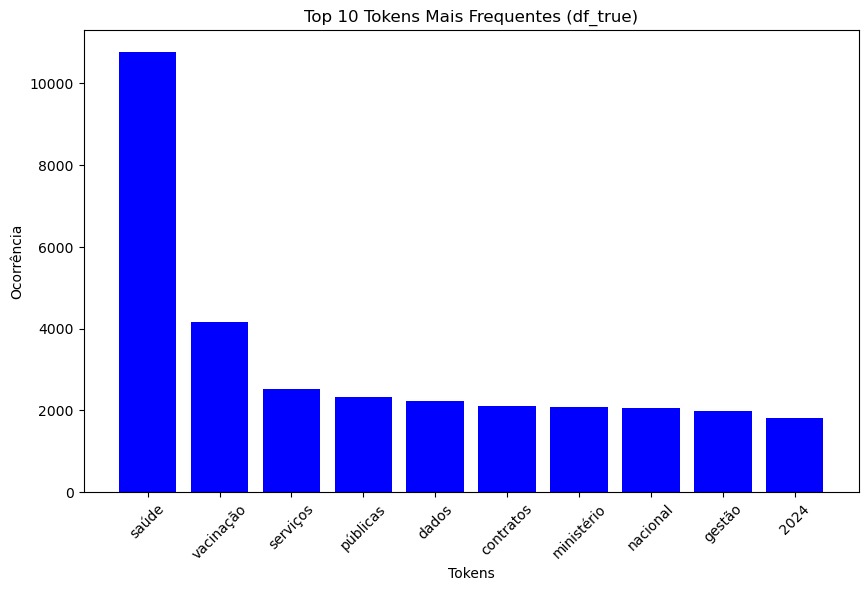

In [9]:
#selecionando os 10 tokens mais frequentes
top_10_tokens = df_frequencia_tokenstrue.head(10)

#plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_tokens['token'], top_10_tokens['ocorrencia'], color='blue')
plt.xlabel('Tokens')
plt.ylabel('Ocorrência')
plt.title('Top 10 Tokens Mais Frequentes (df_true)')
plt.xticks(rotation=45)
plt.show()

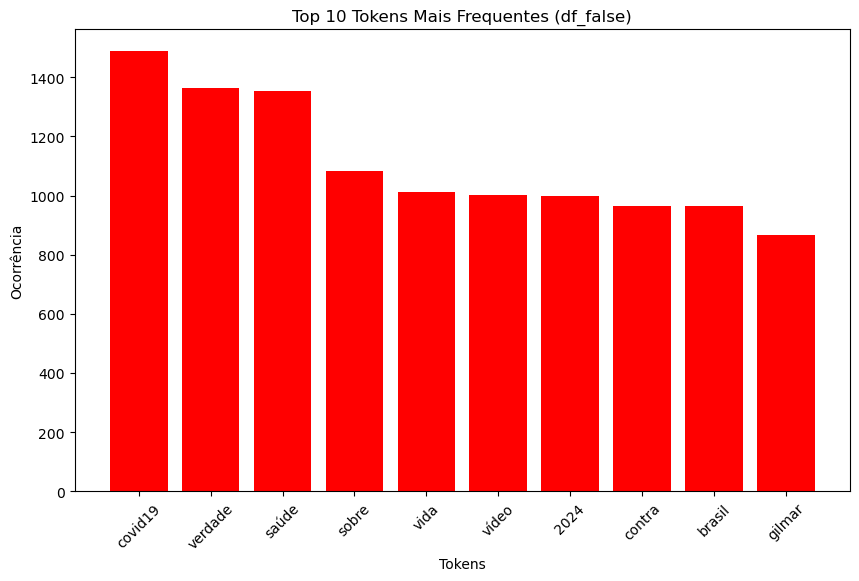

In [10]:
#selecionando os 10 tokens mais frequentes
top_10_tokens2 = df_frequencia_tokensfalse.head(10)

#plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_tokens2['token'], top_10_tokens2['ocorrencia'], color='red')
plt.xlabel('Tokens')
plt.ylabel('Ocorrência')
plt.title('Top 10 Tokens Mais Frequentes (df_false)')
plt.xticks(rotation=45)
plt.show()

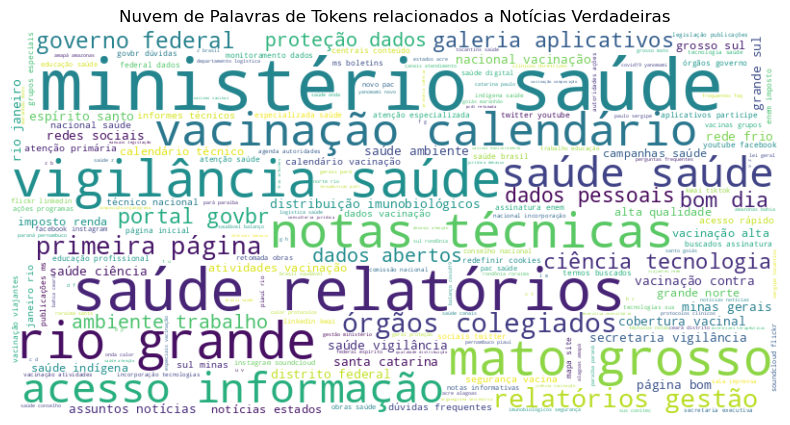

In [11]:
text1 = ' '.join(lista_tokens1)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras de Tokens relacionados a Notícias Verdadeiras')
plt.show()

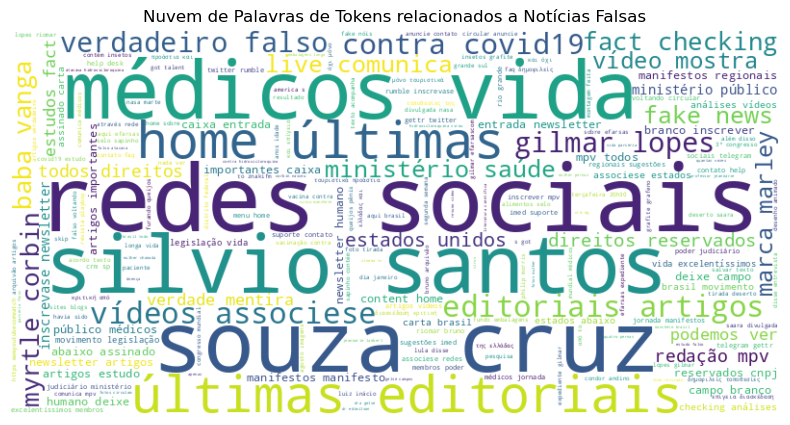

In [12]:
text2 = ' '.join(lista_tokens2)

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras de Tokens relacionados a Notícias Falsas')
plt.show()

In [13]:
combined_df = pd.concat([true_df, false_df], ignore_index=True)
combined_df = shuffle(combined_df).reset_index(drop=True)

display(combined_df)

,title,link,date,Site,noticia_falsa,corpo_texto
0,formulários e sistemas de registro,https://www.gov.br/saude/pt-br/vacinacao/rede-...,Data não disponível,gov.br saude,1,"[formulários, sistemas, registro, ministério, ..."
1,alfabetização fônica como base da autonomia pa...,https://medicospelavidacovid19.com.br/videos/a...,2024-05-09T14:21:11-03:00,Médicos Pela Vida,0,"[alfabetização, fônica, base, autonomia, apren..."
2,carta do brasil – 2021 movimento legislação e ...,https://medicospelavidacovid19.com.br/abaixo-a...,2024-08-22T20:46:04-03:00,Médicos Pela Vida,0,"[médicos, vida, covid19, abaixo, assinado, 100..."
3,nota técnica nº 108/2024-cggi/dpni/svsa/ms,https://www.gov.br/saude/pt-br/vacinacao/notas...,Data não disponível,gov.br saude,1,"[pdf14, 1, 0, obj, type, catalog, version, 14,..."
4,professor jean-marie lambert,https://medicospelavidacovid19.com.br/tag/prof...,2024-08-22T20:46:04-03:00,Médicos Pela Vida,0,"[arquivos, professor, jeanmarie, lambert, mpv,..."
...,...,...,...,...,...,...
666,editorial: é necessária vacinação urgente cont...,https://medicospelavidacovid19.com.br/editoria...,2024-08-22T20:46:04-03:00,Médicos Pela Vida,0,"[editorial, necessária, vacinação, urgente, co..."
667,vacinas,https://medicospelavidacovid19.com.br/tag/vaci...,2024-08-22T20:39:32-03:00,Médicos Pela Vida,0,"[arquivos, vacinas, mpv, skip, to, content, ho..."
668,legislação,https://www.gov.br/saude/pt-br/vacinacao/rede-...,Data não disponível,gov.br saude,1,"[legislação, ministério, saúde, ir, conteúdo, ..."
669,editorial: é hora do sus interromper a distrib...,https://medicospelavidacovid19.com.br/editoria...,2024-08-22T20:46:04-03:00,Médicos Pela Vida,0,"[editorial, hora, sus, interromper, distribuiç..."


In [14]:
combined_df['corpo_texto_str'] = combined_df['corpo_texto'].apply(lambda x: " ".join(x))

tfidf_vectorizer = TfidfVectorizer(
    max_features=10,  # Limit to the top 5000 features
    #stop_words='portuguese',  # Remove Portuguese stop words
    ngram_range=(1, 2),  # Consider both unigrams and bigrams
    min_df=2,  # Ignore terms that appear in fewer than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

try:
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['corpo_texto_str'])
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
except ValueError as e:
    print(f"Error during TF-IDF vectorization: {e}")

tfidf_matrix

TF-IDF matrix shape: (671, 10)


<671x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3956 stored elements in Compressed Sparse Row format>

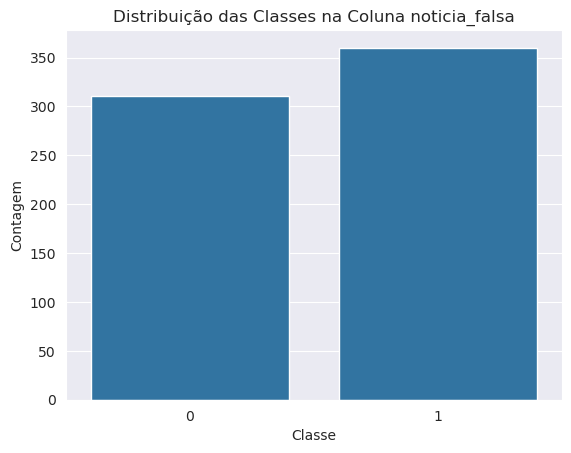

In [15]:
# Configurar o estilo do gráfico
sns.set_style('darkgrid')

# Criar o gráfico de contagem
sns.countplot(x='noticia_falsa', data=combined_df)

# Adicionar rótulos e título
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes na Coluna noticia_falsa')
plt.show()

#### Matriz de TF-IDF

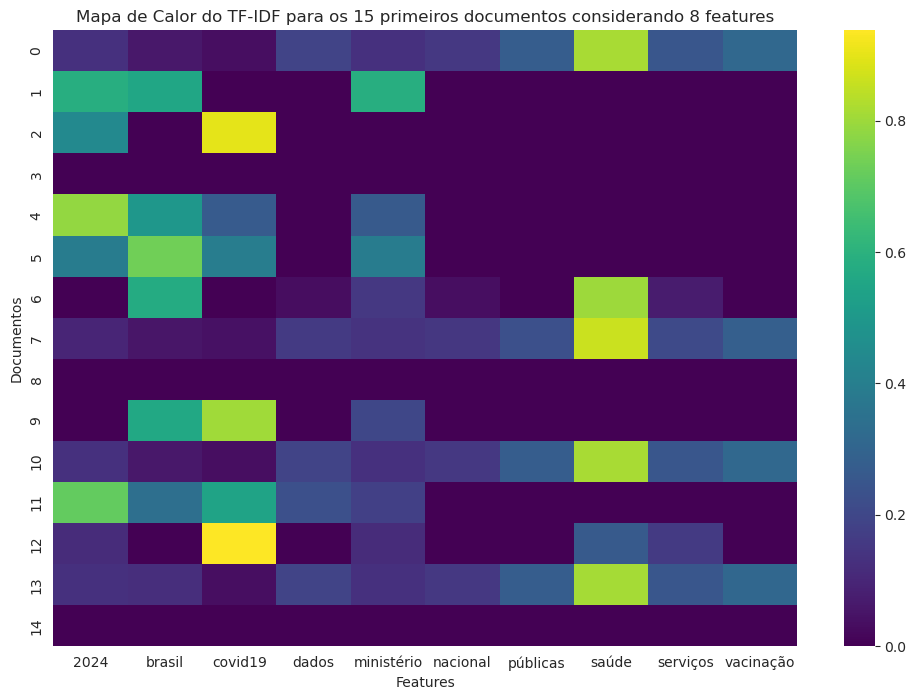

In [16]:
tfidf_dense = tfidf_matrix.todense()

tfidf_df = pd.DataFrame(tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

tfidf_sample = tfidf_df.head(15)

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_sample, cmap="viridis", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Mapa de Calor do TF-IDF para os 15 primeiros documentos considerando 8 features")
plt.xlabel("Features")
plt.ylabel("Documentos")
plt.show()

### Divisão Treino e Teste

In [17]:
text_tfidf = tfidf_vectorizer.fit_transform(combined_df['corpo_texto'].apply(lambda x: ' '.join(x)))

In [18]:
X = text_tfidf
y = combined_df['corpo_texto']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"X_train tamanho: {X_treino.shape}")
print(f"X_test tamanho: {X_teste.shape}")
print(f"y_train tamanho: {y_treino.shape}")
print(f"y_test tamanho: {y_teste.shape}")

X_train tamanho: (536, 10)
X_test tamanho: (135, 10)
y_train tamanho: (536,)
y_test tamanho: (135,)


### Naive Bayes

In [19]:
# Verifique se algum elemento em y_treino ou y_teste é uma lista e achate, se necessário
if any(isinstance(i, list) for i in y_treino):
    y_treino = [item for sublist in y_treino for item in sublist]

if any(isinstance(i, list) for i in y_teste):
    y_teste = [item for sublist in y_teste for item in sublist]

# Agora verifique os rótulos únicos
unique_treino_labels = set(y_treino)
unique_teste_labels = set(y_teste)

print("Rótulos únicos no conjunto de treino:", unique_treino_labels)
print("Rótulos únicos no conjunto de teste:", unique_teste_labels)
print("Rótulos no conjunto de teste que não estão no conjunto de treino:", unique_teste_labels - unique_treino_labels)


Rótulos únicos no conjunto de treino: {'estados', 'tud', 'energy', 'simplificando', 'resumiu', 'rn_v', '5x5cm', 'ingredientes', 'mouse', 'estudasse', 'computador', 'acaso', 'onlinecursos', 'catarina', 'maconha', 'malaysia', 'igg4', 'icterícia', 'telemedicina', 'simulado', 'estudados', 'supermercados', 'acabando', 'priorizações', 'conforme', 'h421', 'dtp1', '4vs4hyo4a5ixsnlqtd6ejwop8ozpjfai9uzab3yq7fxyq7fxyq7fxyq7fxyq7fxyq7fxyq7fxyq7', 'cigarro', 'espalharam', 'imortalidade', 'prendeu', 'sbirideltsdpgsnnjzx7j07hbw9uhvkr6p8zyh4gnak798vzjopljsncsvdosrbmi1k9sawao', 'preparação', 'aiu', 'alfreda', 'buscaram', 'província', 'anticientífica', 'chamando', 'authorisation', 'consumidores', 'subordinados', 'permitirão', '21941611', 'pose', 'sul6', 'iremos', 'capacitação', 'mercosul', 'nessa', 'desastrosa', 'emitida', 'ruastendênciaúltimasassistabebês', 'grosso', 'licenciou', 'kalager', 'dezembro', 'instead', 'prorrogação', '1500', 'aplicativo', 'cabalmente', 'sujeita', 'exibidos', '1932012', 'foll

In [20]:
# Assuming combined_df is your merged DataFrame with a column 'label'
X = combined_df['corpo_texto'].apply(lambda x: " ".join(x))  # Use text as features
y = combined_df['noticia_falsa']  # Use your label column

# Ensure stratified sampling to maintain label distribution
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Acurácia: 0.83


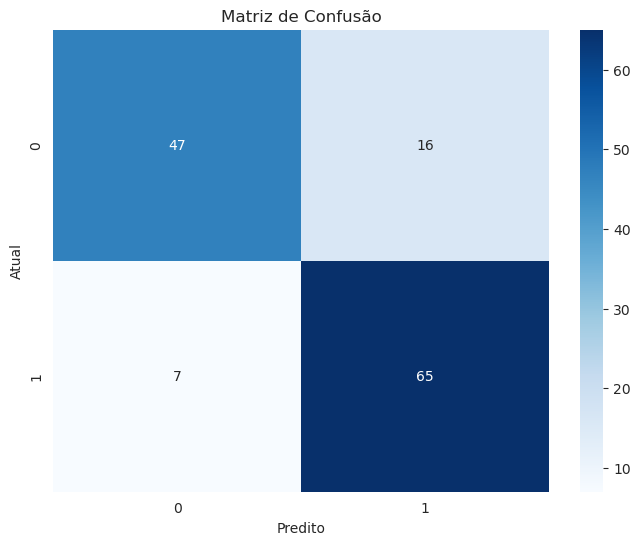

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        63
           1       0.80      0.90      0.85        72

    accuracy                           0.83       135
   macro avg       0.84      0.82      0.83       135
weighted avg       0.83      0.83      0.83       135



In [21]:
vectorizer = TfidfVectorizer(max_features=8)  # Número de features pode ser mudado
X_treino_vectorized = vectorizer.fit_transform(X_treino)
X_teste_vectorized = vectorizer.transform(X_teste)

# converter os "labels" para strings
y_treino = [str(label[0]) if isinstance(label, list) else str(label) for label in y_treino]
y_teste = [str(label[0]) if isinstance(label, list) else str(label) for label in y_teste]

# encaixando o label no treino e teste
label_encoder = LabelEncoder()
y_combined = y_treino + y_teste  # caber todos os labels
label_encoder.fit(y_combined)

y_treino_encoded = label_encoder.transform(y_treino)
y_teste_encoded = label_encoder.transform(y_teste)

# Treinamento do modelo Naive Bayes
naive_bayes_modelo = MultinomialNB()
naive_bayes_modelo.fit(X_treino_vectorized, y_treino_encoded)

# Predição
y_pred = naive_bayes_modelo.predict(X_teste_vectorized)

# Métricas
acuracia = accuracy_score(y_teste_encoded, y_pred)
confusao = confusion_matrix(y_teste_encoded, y_pred)
classification_rep = classification_report(y_teste_encoded, y_pred)

print(f"Acurácia: {acuracia:.2f}")

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()

print("Classification Report:")
print(classification_rep)

### Árvore de Decisão

Acurácia da Árvore de Decisão: 0.8552036199095022
Matriz de Confusão da Árvore de Decisão:
 [[ 86  22]
 [ 10 103]]
Classification Report da Árvore de Decisão:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84       108
           1       0.82      0.91      0.87       113

    accuracy                           0.86       221
   macro avg       0.86      0.85      0.85       221
weighted avg       0.86      0.86      0.85       221



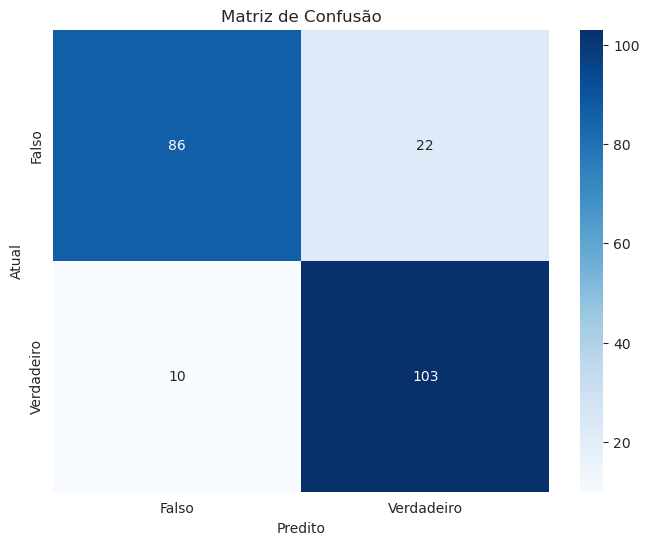

In [22]:
# Example: Assuming 'corpo_texto' is the text column and 'noticia_falsa' is the label column
# Your dataset loading code here

# Combine datasets and make sure 'corpo_texto' is in string format
combined_df['corpo_texto'] = combined_df['corpo_texto'].apply(lambda x: ' '.join(x))

# Split the data
X_treino = combined_df['corpo_texto'][:450]  # Adjust indices as necessary
X_teste = combined_df['corpo_texto'][450:]
y_treino = combined_df['noticia_falsa'][:450]
y_teste = combined_df['noticia_falsa'][450:]

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Adjust max_features if needed
X_treino_vectorized = vectorizer.fit_transform(X_treino)
X_teste_vectorized = vectorizer.transform(X_teste)

# Convert y_treino and y_teste to numpy arrays for compatibility
y_treino = np.array(y_treino)
y_teste = np.array(y_teste)

# Definindo o modelo de árvore de decisão
arvore_decisao = DecisionTreeClassifier()
arvore_decisao.fit(X_treino_vectorized, y_treino)

# Avaliação do modelo
def avaliar_modelo(modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    acuracia = accuracy_score(y_teste, y_pred)
    confusao = confusion_matrix(y_teste, y_pred)
    classification_rep = classification_report(y_teste, y_pred)

    return acuracia, confusao, classification_rep

# Avaliação da Árvore de Decisão
dt_accuracy, dt_confusion, dt_classification = avaliar_modelo(arvore_decisao, X_teste_vectorized, y_teste)
print("Acurácia da Árvore de Decisão:", dt_accuracy)
print("Matriz de Confusão da Árvore de Decisão:\n", dt_confusion)
print("Classification Report da Árvore de Decisão:\n", dt_classification)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadeiro'], yticklabels=['Falso', 'Verdadeiro'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()

### Classificador Passivo Agressivo

Acurácia do Passive Aggressive Classifier: 0.8778280542986425
Matriz de Confusão do Passive Aggressive Classifier:
 [[ 88  20]
 [  7 106]]
Classification Report do Passive Aggressive Classifier:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       108
           1       0.84      0.94      0.89       113

    accuracy                           0.88       221
   macro avg       0.88      0.88      0.88       221
weighted avg       0.88      0.88      0.88       221



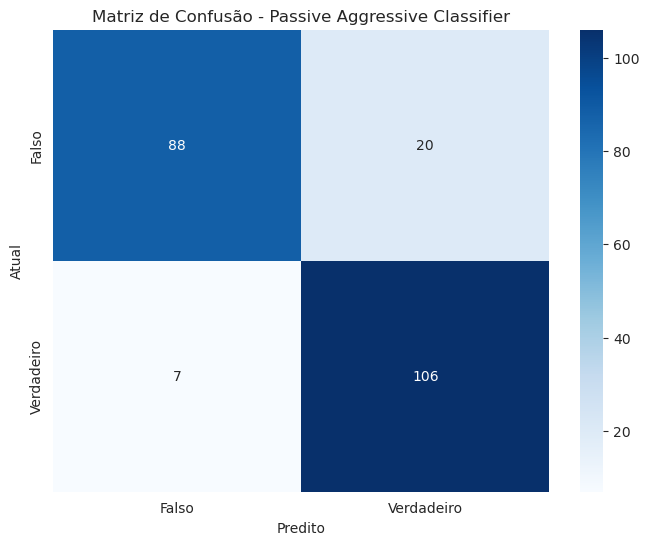

In [23]:
# Treino Passivo Agressivo
passive_agressive = PassiveAggressiveClassifier()
passive_agressive.fit(X_treino_vectorized, y_treino)

# Avaliação do classificador
pac_accuracy, pac_confusion, pac_classification = avaliar_modelo(passive_agressive, X_teste_vectorized, y_teste)
print("Acurácia do Passive Aggressive Classifier:", pac_accuracy)
print("Matriz de Confusão do Passive Aggressive Classifier:\n", pac_confusion)
print("Classification Report do Passive Aggressive Classifier:\n", pac_classification)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(pac_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadeiro'], yticklabels=['Falso', 'Verdadeiro'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão - Passive Aggressive Classifier')
plt.show()


### Floresta Aleatória

In [24]:
# Definindo o modelo da floresta

random_forest = RandomForestClassifier(n_estimators=739)
random_forest.fit(X_treino_vectorized, y_treino)

rf_accuracy, rf_confusion, rf_classification = avaliar_modelo(random_forest, X_teste_vectorized, y_teste)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)

Random Forest Accuracy: 0.9140271493212669
Random Forest Confusion Matrix:
 [[ 97  11]
 [  8 105]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.91      0.93      0.92       113

    accuracy                           0.91       221
   macro avg       0.91      0.91      0.91       221
weighted avg       0.91      0.91      0.91       221



### Regressão Logística

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_treino_vectorized, y_treino)

lr_accuracy, lr_confusion, lr_classification = avaliar_modelo(logistic_regression, X_teste_vectorized, y_teste)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)

Logistic Regression Accuracy: 0.8823529411764706
Logistic Regression Confusion Matrix:
 [[ 94  14]
 [ 12 101]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.88      0.89      0.89       113

    accuracy                           0.88       221
   macro avg       0.88      0.88      0.88       221
weighted avg       0.88      0.88      0.88       221



### GBM

In [26]:
# Inicialização do modelo
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=13)

# Treinar o modelo
gbm.fit(X_treino_vectorized, y_treino)

#predição
y_pred = gbm.predict(X_teste_vectorized)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.08735099278251227
Mean Absolute Error: 0.15729487582309537
R^2 Score: 0.6504170896025336


#### XGBoost

In [43]:
xgb = XGBClassifier(n_estimators = 20, max_depth = 6, learning_rate = 0.1, subsample = 0.8, random_state = 10)

xgb.fit(X_treino_vectorized, y_treino)

y_pred = xgb.predict(X_teste_vectorized)

# DataFrame com os dados
df_xgb = pd.DataFrame(data={'Rótulo Atual': y_teste, 'Rótulo Predito:': y_pred}).head(50)

xgb_accuracy, xgb_confusion, xgb_classification = avaliar_modelo(xgb, X_teste_vectorized, y_teste)

display(df_xgb)
print("XGB Accuracy:", xgb_accuracy)
print("XGB Confusion Matrix:\n", xgb_confusion)
print("XGB Classification Report:\n", xgb_classification)

,Rótulo Atual,Rótulo Predito:
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


XGB Accuracy: 0.9095022624434389
XGB Confusion Matrix:
 [[ 94  14]
 [  6 107]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       108
           1       0.88      0.95      0.91       113

    accuracy                           0.91       221
   macro avg       0.91      0.91      0.91       221
weighted avg       0.91      0.91      0.91       221



### Name Entity Recognition - NER

In [28]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# Certifique-se de que todos os títulos são strings
combined_df['title'] = combined_df['title'].astype(str)

# Criar uma lista para armazenar os resultados
entities_list = []

# Iterar sobre cada título no dataframe
for title in combined_df['title']:
    if isinstance(title, str):  # Verificar se o título é uma string
        tokens = word_tokenize(title)  # Tokenizar o título em palavras
        tagged_tokens = pos_tag(tokens)  # Fazer a marcação de POS nos tokens
        entities = ne_chunk(tagged_tokens)  # Reconhecimento de entidades nomeadas
        entities_list.append(entities)  # Adicionar o resultado à lista
    else:
        print(f"Título inválido encontrado: {title}")

# Exibir as entidades nomeadas para cada título
for entities in entities_list:
    print(entities)

(S formulários/NNS e/VBP sistemas/FW de/FW registro/FW)
(S
  alfabetização/NN
  fônica/NN
  como/NN
  base/NN
  da/NN
  autonomia/NN
  para/NN
  aprender​/NN)
(S
  carta/NNS
  do/VBP
  brasil/RB
  –/VB
  2021/CD
  movimento/NN
  legislação/NN
  e/NN
  vida/NN)
(S nota/NN técnica/NN nº/IN 108/2024-cggi/dpni/svsa/ms/JJ)
(S professor/JJ jean-marie/NN lambert/NN)
(S transtorno/NNS do/VBP espectro/RB autista/VB -/: tea/NN)
(S
  classificação/NN
  de/FW
  risco/FW
  de/FW
  transmissão/FW
  de/FW
  doenças/FW
  imunopreveníveis/VB
  a/DT
  partir/NN
  de/FW
  indicadores/FW
  de/FW
  coberturas/FW
  vacinais/FW
  nos/FW
  municípios/NNS
  brasileiros/NNS)
(S
  operação/NN
  gota/NN
  dobra/NN
  doses/VBZ
  de/IN
  vacina/FW
  aplicadas/NNS
  em/VBP
  populações/JJ
  indígenas/NNS
  em/VBP
  2023/CD)
(S nota/NN técnica/NN nº/IN 101/2024-dpni/svsa/ms/JJ)
(S 26/CD)
(S
  situação/NN
  da/NN
  distribuição/NN
  de/IN
  imunobiológicos/FW
  aos/JJ
  estados/NN
  para/NN
  a/DT
  rotina/NN
  do/VBP

In [30]:
# Importar spaCy e displacy
import spacy
from spacy import displacy

# Carregar o modelo de linguagem para português (ou outro idioma relevante)
nlp = spacy.load('pt_core_news_sm')  # Certifique-se de que o modelo está instalado

# Concatenar todos os textos em um só (ou usar um texto específico)
for i in range(4):
    all_texts = combined_df['title'].values[i]

# Processar o texto usando spaCy
    doc = nlp(all_texts)

# Visualizar as dependências sintáticas no Jupyter
    displacy.render(doc, style='dep', jupyter=True)

### Validação e Avaliação do Modelo

In [31]:
# Testando e avaliando a regressão logística
lr_test_predicitions = logistic_regression.predict(X_teste_vectorized)
lr_test_precision = precision_score(y_teste, lr_test_predicitions)
lr_test_recall = recall_score(y_teste, lr_test_predicitions)
lr_test_f1 = f1_score(y_teste, lr_test_predicitions)

# Floresta Aleatória
rf_test_predicitions = random_forest.predict(X_teste_vectorized)
rf_test_precision = precision_score(y_teste, rf_test_predicitions)
rf_test_recall = recall_score(y_teste, rf_test_predicitions)
rf_test_f1 = f1_score(y_teste, rf_test_predicitions)

# Passivo Agressivo
pa_test_predicitions = passive_agressive.predict(X_teste_vectorized)
pa_test_precision = precision_score(y_teste, pa_test_predicitions)
pa_test_recall = recall_score(y_teste, pa_test_predicitions)
pa_test_f1 = f1_score(y_teste, pa_test_predicitions)

# Árvore de Decisão
dt_test_predicitions = arvore_decisao.predict(X_teste_vectorized)
dt_test_precision = precision_score(y_teste, dt_test_predicitions)
dt_test_recall = recall_score(y_teste, dt_test_predicitions)
dt_test_f1 = f1_score(y_teste, dt_test_predicitions)

# Printando os resultados
print("Precisão do teste de Regressão Logística:", lr_test_precision)
print("Recall do teste de Regressão Logística:", lr_test_recall)
print("F1 Score da Regressão Logística:", lr_test_f1)
print()
print("Precisão do teste da Floresta Aleatória:", rf_test_precision)
print("Recall do teste da Floresta Aleatória:", rf_test_recall)
print("F1 Score da Floresta Aleatória:", rf_test_f1)
print()
print("Precisão do teste do Classificador Passivo Agressivo:", pa_test_precision)
print("Recall do teste do Classificador Passivo Agressivo:", pa_test_recall)
print("F1 Score do Classificador Passivo Agressivo:", pa_test_f1)
print()
print("Precisão do teste da Árvore de Decisão:", dt_test_precision)
print("Recall do teste da Árvore de Decisão:", dt_test_recall)
print("F1 Score da Árvore de Decisão:", dt_test_f1)

Precisão do teste de Regressão Logística: 0.8782608695652174
Recall do teste de Regressão Logística: 0.8938053097345132
F1 Score da Regressão Logística: 0.8859649122807017

Precisão do teste da Floresta Aleatória: 0.9051724137931034
Recall do teste da Floresta Aleatória: 0.9292035398230089
F1 Score da Floresta Aleatória: 0.9170305676855895

Precisão do teste do Classificador Passivo Agressivo: 0.8412698412698413
Recall do teste do Classificador Passivo Agressivo: 0.9380530973451328
F1 Score do Classificador Passivo Agressivo: 0.8870292887029289

Precisão do teste da Árvore de Decisão: 0.824
Recall do teste da Árvore de Decisão: 0.911504424778761
F1 Score da Árvore de Decisão: 0.865546218487395


### Plots

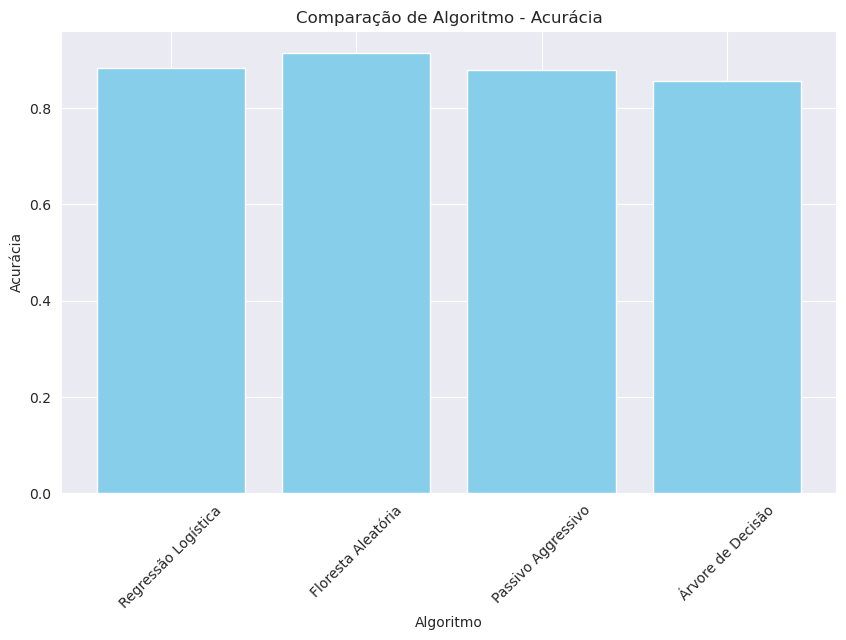

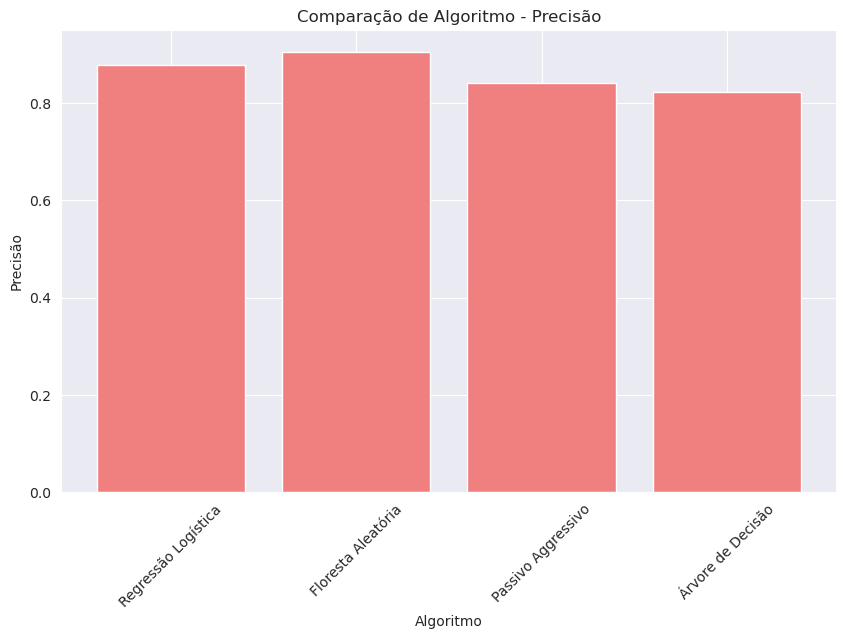

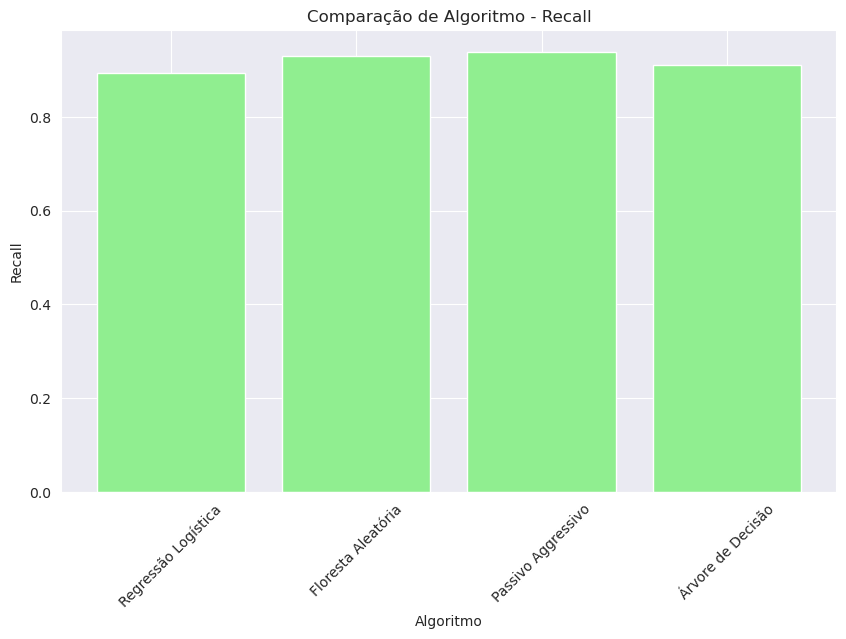

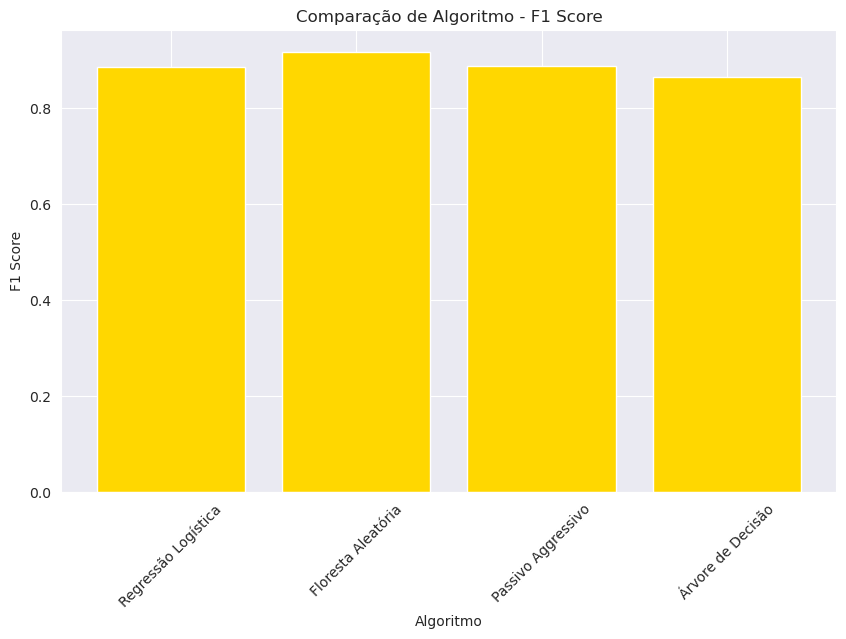

In [32]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Regressão Logística', 'Floresta Aleatória', 'Passivo Aggressivo', 'Árvore de Decisão']
accuracies = [lr_accuracy, rf_accuracy, pac_accuracy, dt_accuracy]
precisions = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recalls = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.title('Comparação de Algoritmo - Acurácia')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precisions, color='lightcoral')
plt.xlabel('Algoritmo')
plt.ylabel('Precisão')
plt.title('Comparação de Algoritmo - Precisão')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color='lightgreen')
plt.xlabel('Algoritmo')
plt.ylabel('Recall')
plt.title('Comparação de Algoritmo - Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores, color='gold')
plt.xlabel('Algoritmo')
plt.ylabel('F1 Score')
plt.title('Comparação de Algoritmo - F1 Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x1200 with 0 Axes>

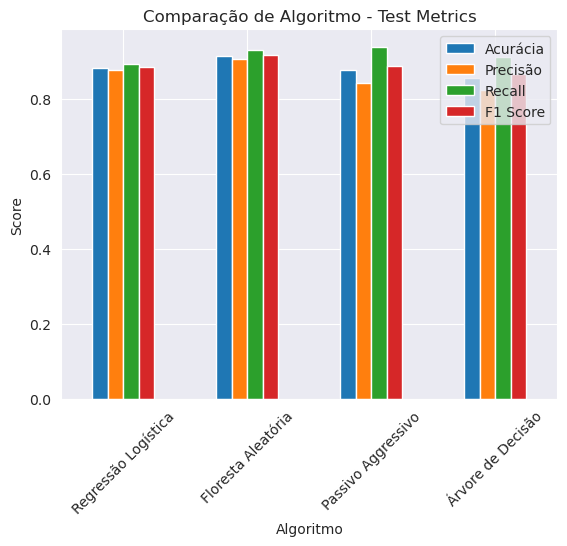

In [33]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Regressão Logística', 'Floresta Aleatória', 'Passivo Aggressivo', 'Árvore de Decisão']
accuracy_scores = [lr_accuracy, rf_accuracy, pac_accuracy, dt_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algoritmo': algorithms,
    'Acurácia': accuracy_scores,
    'Precisão': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algoritmo', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(16, 12))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algoritmo')
plt.ylabel('Score')
plt.title('Comparação de Algoritmo - Test Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


### Validação do Modelo

In [44]:
# Função para predição dos títulos
def predict_title(title_text):
    # Pré-processamento do título
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    # Converter em vetores de TF-IDF
    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    #Fazer a predição
    prediction = xgb.predict(tfidf_vector)

    return preprocessed_title_text, tfidf_vector, prediction

# Títulos de Exemplo
titulo_1 = 'A vacina contra a Covid-19 vai modificar o DNA dos seres humanos'
titulo_2 = 'Entenda o efeito colateral raro da vacina da AstraZeneca contra covid-19'
titulo_3 = 'A vacina contra a Covid-19 tem chip líquido e inteligência artificial para controle populacional'
titulo_4 = 'Covid-19: Rio vacina população contra variante XBB até domingo'

# Predizer e mostrar os resultado para os títulos
prediction_1 = predict_title(titulo_1)
prediction_2 = predict_title(titulo_2)
prediction_3 = predict_title(titulo_3)
prediction_4 = predict_title(titulo_4)

print(prediction_1, prediction_2, prediction_3, prediction_4)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely fake.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely fake.")

if prediction_3 == 1:
    print("Title 3: The news is likely true.")
else:
    print("Title 3: The news is likely fake.")

if prediction_4 == 1:
    print("Title 4: The news is likely true.")
else:
    print("Title 4: The news is likely fake.")

(['vacina', 'contra', 'covid-19', 'vai', 'modificar', 'dna', 'seres', 'humanos'], <1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, array([1])) (['entenda', 'efeito', 'colateral', 'raro', 'vacina', 'astrazeneca', 'contra', 'covid-19'], <1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, array([1])) (['vacina', 'contra', 'covid-19', 'chip', 'líquido', 'inteligência', 'artificial', 'controle', 'populacional'], <1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, array([1])) (['covid-19', ':', 'rio', 'vacina', 'população', 'contra', 'variante', 'xbb', 'domingo'], <1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, array([1]))
Title 1: The news is likely fake.
Title 2: The news is likely fake.
Title 3: The news is likely fake.
Title 4: The news is likel